In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("corona_data.csv")
df.head()

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,0
1,75,102,1,0,0,1
2,25,98,0,0,0,1
3,34,97,0,0,0,0
4,4,96,0,1,0,1


In [3]:
df.infection_Probability.value_counts()

0    3598
1    3506
Name: infection_Probability, dtype: int64

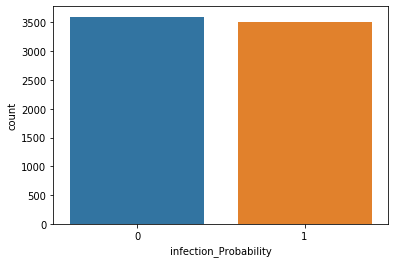

In [4]:
sns.countplot(df.infection_Probability)
plt.show()

In [5]:
cond_1=(df['Fever']>100)&(df['BodyPains']==1)&(df['RunnyNose']==1)&(df['Difficulty_in_Breath']==1)
df['infection_Probability'][cond_1]=1

In [6]:
df[cond_1]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
6,44,103,1,1,1,1
7,57,103,1,1,1,1
47,90,105,1,1,1,1
48,4,105,1,1,1,1
67,72,103,1,1,1,1
...,...,...,...,...,...,...
7019,58,104,1,1,1,1
7030,13,107,1,1,1,1
7070,38,102,1,1,1,1
7098,83,103,1,1,1,1


In [7]:
cond_2=(df['Age']>=65)&(df['Fever']>99)&(df['RunnyNose']==1)&(df['Difficulty_in_Breath']==1)|(df['BodyPains']==1)
df['infection_Probability'][cond_2]=1

In [8]:
df[cond_2]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,1
1,75,102,1,0,0,1
6,44,103,1,1,1,1
7,57,103,1,1,1,1
8,88,99,1,1,1,1
...,...,...,...,...,...,...
7093,61,98,1,0,0,1
7096,76,98,1,1,0,1
7097,57,96,1,0,0,1
7098,83,103,1,1,1,1


In [9]:
cond_3=(df['Fever']>100)&(df['BodyPains']==0)&(df['RunnyNose']==0)&(df['Difficulty_in_Breath']==0)
df['infection_Probability'][cond_3]=0
df[cond_3]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
16,36,107,0,0,0,0
18,17,104,0,0,0,0
21,70,108,0,0,0,0
27,7,108,0,0,0,0
38,70,101,0,0,0,0
...,...,...,...,...,...,...
7082,97,107,0,0,0,0
7090,42,103,0,0,0,0
7095,59,101,0,0,0,0
7100,22,104,0,0,0,0


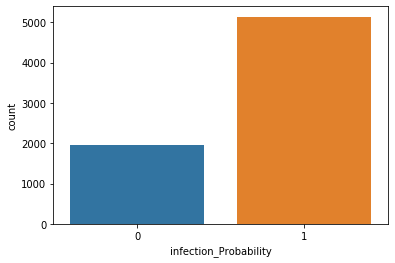

In [10]:
sns.countplot(df.infection_Probability)
plt.show()

In [11]:
df.shape

(7104, 6)

In [12]:
df.head(5)

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,1
1,75,102,1,0,0,1
2,25,98,0,0,0,1
3,34,97,0,0,0,0
4,4,96,0,1,0,1


In [13]:
X=df.drop('infection_Probability',axis=1).values
Y=df['infection_Probability'].values

In [14]:
from sklearn.model_selection import StratifiedKFold,cross_val_score,ShuffleSplit,GridSearchCV
cv = StratifiedKFold(n_splits=5,random_state=11)
for train_index, test_index in cv.split(X,Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

print(X_train.shape)
 
print(X_test.shape)

(5684, 5)
(1420, 5)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score

#Logistic Regression
lg = LogisticRegression(class_weight='balanced')
lg.fit(X_train,y_train)
lg_pred = lg.predict(X_test)
lg_acc = accuracy_score(y_test,lg_pred)
print(lg_acc)
 
cv_scores = cross_val_score(lg,X,Y,cv=cv)
 
print(cv_scores)
 

0.7971830985915493
[0.75228712 0.78465869 0.78676988 0.7565095  0.7971831 ]


In [16]:
dc = DecisionTreeClassifier(class_weight='balanced')
dc.fit(X_train,y_train)
dc_pred = dc.predict(X_test)
dc_acc = accuracy_score(y_test,dc_pred)
print(dc_acc)
 
cv_scores = cross_val_score(dc,X,Y,cv=cv)
 
print(cv_scores)

0.8253521126760563
[0.80577058 0.81421534 0.8085855  0.78325123 0.82464789]


In [17]:
f1=f1_score(y_test,dc_pred)
print(f1)

0.8784313725490195


In [18]:
f2=f1_score(y_test,lg_pred)
print(f2)

0.8376550169109357


In [19]:
def find_best_model(X,Y):
    algos = {
         
        'logistic_reg':{
            'model':LogisticRegression(class_weight='balanced'),
        'params' :{
            'penalty':['l1','l2'],
            'C':[0.0001,0.001,0.01,0.1,1.0,10,100,1000]
        }
    },
         
    'DT_clf':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy'],
            'max_depth': [2,4,6,8,12]
        }
    }
    }
     
     
    scores =[]
     
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=500)
     
    for algo_name,config in algos.items():
        gd = GridSearchCV(config['model'],param_grid=config['params'],cv=cv,return_train_score=False)
        gd.fit(X,Y)
         
        scores.append({
            'model':algo_name,
            'best_score':gd.best_score_,
            'best_params':gd.best_params_
             
        })
         
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [20]:
find_best_model(X_train,y_train)

,model,best_score,best_params
0,logistic_reg,0.788566,"{'C': 0.001, 'penalty': 'l2'}"
1,DT_clf,0.804749,"{'criterion': 'gini', 'max_depth': 12}"


In [21]:
dc  = DecisionTreeClassifier(criterion='gini',max_depth=6,class_weight='balanced')
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)
accuracy_score(y_test,y_pred)

0.8169014084507042

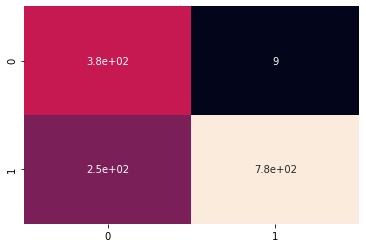

In [22]:
tr_cm = confusion_matrix(y_test,y_pred)
tr_df = pd.DataFrame(data=tr_cm,columns=['0','1'],index=['0','1'])
sns.heatmap(tr_df,annot=True,cbar=False)
plt.show()

In [23]:
f1 = f1_score(y_test,y_pred)
print(f1)
 
pr = precision_score(y_test,y_pred)
print(pr)
 
rc = recall_score(y_test,y_pred)
print(rc)

0.8565121412803532
0.9885350318471338
0.7555988315481986


In [24]:
#positive prediction check
dc.predict([[60,100,1,1,1]])[0]

1

In [25]:
#negetive prediciton check
dc.predict([[60,100,0,0,0]])[0]

0

In [26]:
import pickle
with open('corona.pkl','wb') as f:
    pickle.dump(dc,f)


In [27]:
pickle_in=open('corona.pkl','rb')
model=pickle.load(pickle_in)